In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("D:/Data_Analytics/Machine learning/archive/loan_data_set.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# abhi nulll values present nhi h agar rehti toh aise fill krte 
data["ApplicantIncome"].fillna(data["ApplicantIncome"].mean(),inplace=True)

C:\Users\Hakim\AppData\Local\Temp\ipykernel_6592\1323793585.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ApplicantIncome"].fillna(data["ApplicantIncome"].mean(),inplace=True)


In [7]:
data["ApplicantIncome"]

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

C:\Users\Hakim\AppData\Local\Temp\ipykernel_6592\2074043954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ApplicantIncome"])


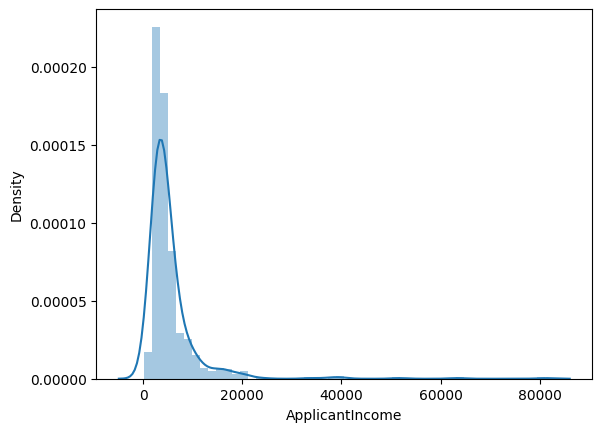

In [9]:
sns.distplot(data["ApplicantIncome"])
plt.show()

In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## automatic scaling through scikit learn 

In [12]:
from sklearn.preprocessing import StandardScaler 

In [20]:
ss= StandardScaler()

In [23]:
x = ss.fit(data[["ApplicantIncome"]])

In [29]:
data["ApplicantIncome_ss"]= pd.DataFrame(ss.transform(data[["ApplicantIncome"]]),columns=["x"])

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,0.072991,0.0,NaN,360.0,1.0,Urban,Y,-0.885211
1,LP001003,Male,Yes,1,Graduate,No,-0.134412,1508.0,128.0,360.0,1.0,Rural,N,-0.885245
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393747,0.0,66.0,360.0,1.0,Urban,Y,-0.885288
3,LP001006,Male,Yes,0,Not Graduate,No,-0.462062,2358.0,120.0,360.0,1.0,Urban,Y,-0.885299
4,LP001008,Male,No,0,Graduate,No,0.097728,0.0,141.0,360.0,1.0,Urban,Y,-0.885207


In [34]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,6.140000e+02,614.000000,592.000000,600.00000,564.000000,614.000000
mean,-4.339634e-18,1621.245798,146.412162,342.00000,0.842199,-0.885223
std,1.000815e+00,2926.248369,85.587325,65.12041,0.364878,0.000164
min,-8.606493e-01,0.000000,9.000000,12.00000,0.000000,-0.885364
25%,-4.138159e-01,0.000000,100.000000,360.00000,1.000000,-0.885291
50%,-2.606393e-01,1188.500000,128.000000,360.00000,1.000000,-0.885266
75%,6.414426e-02,2297.250000,168.000000,360.00000,1.000000,-0.885213
max,1.238462e+01,41667.000000,700.000000,480.00000,1.000000,-0.883194


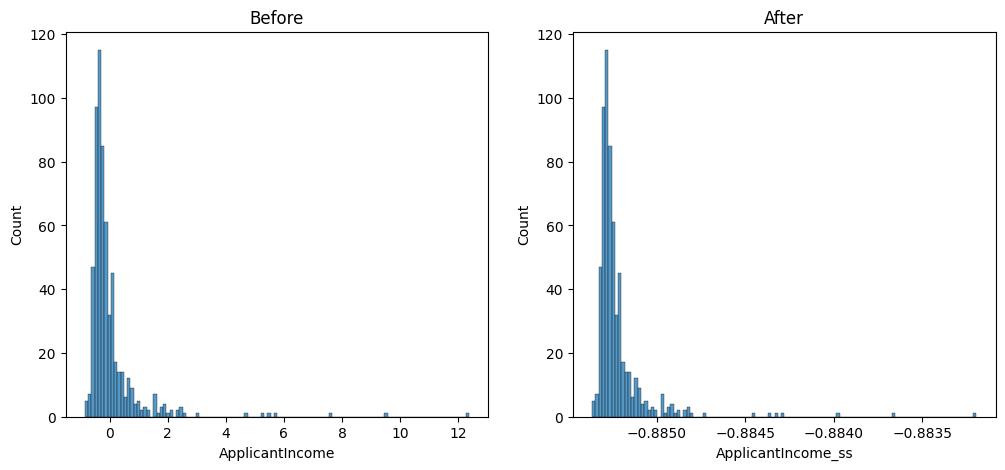

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Before")
sns.histplot(data["ApplicantIncome"])

plt.subplot(1,2,2)
plt.title("After")
sns.histplot(data["ApplicantIncome_ss"])
plt.show()

C:\Users\Hakim\AppData\Local\Temp\ipykernel_6592\26107073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["ApplicantIncome_ss"])


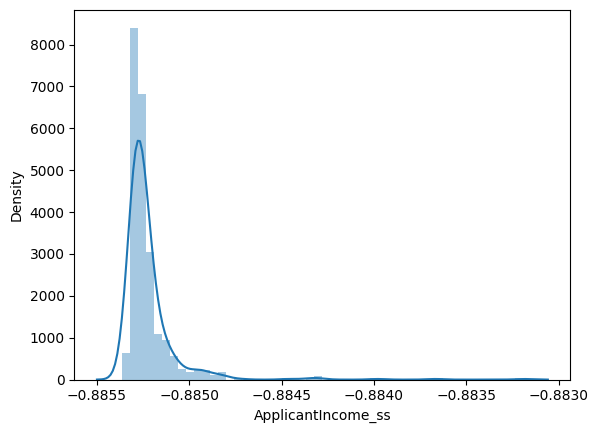

In [35]:
sns.distplot(data["ApplicantIncome_ss"])
plt.show()